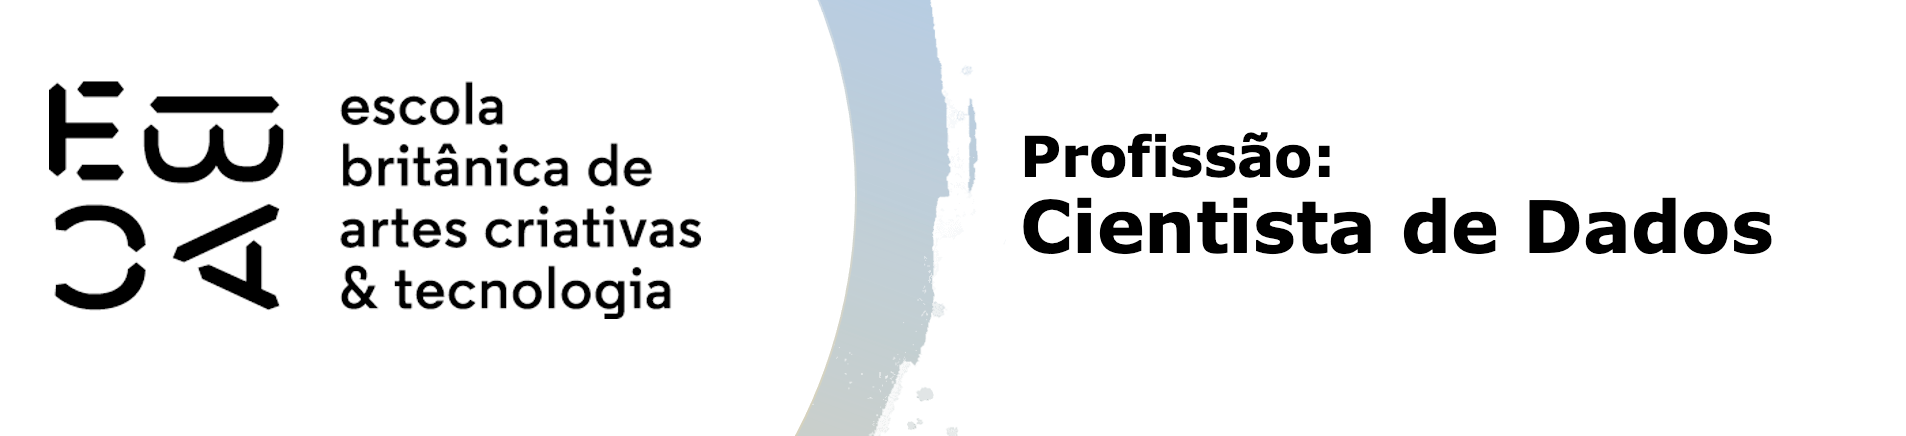

# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [4]:
# Identificar os três últimos meses de data_ref
ultimos_meses = df['data_ref'].sort_values().unique()[-3:]

# Separar os dados em treino e validação OOT
df_treino = df[~df['data_ref'].isin(ultimos_meses)].copy()
df_oot = df[df['data_ref'].isin(ultimos_meses)].copy()

# Remover as colunas data_ref e index
df_treino = df_treino.drop(columns=['data_ref', 'index'])
df_oot = df_oot.drop(columns=['data_ref', 'index'])

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [5]:
# Número total de linhas
total_linhas = df.shape[0]

# Número de linhas por mês em data_ref
linhas_por_mes = df['data_ref'].value_counts().sort_index()

print(f"Número total de linhas: {total_linhas}")
print("Número de linhas por mês em data_ref:")
print(linhas_por_mes)

Número total de linhas: 750000
Número de linhas por mês em data_ref:
data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64


In [6]:
# Identificação das variáveis qualitativas e quantitativas
qualitativas = df.select_dtypes(include=['object', 'category']).columns
quantitativas = df.select_dtypes(include=['number']).columns

# Descritiva para variáveis qualitativas
print("Descritiva das variáveis qualitativas:")
for col in qualitativas:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Descritiva para variáveis quantitativas
print("\nDescritiva das variáveis quantitativas:")
df[quantitativas].describe().T

Descritiva das variáveis qualitativas:

sexo:
sexo
F    504580
M    245420
Name: count, dtype: int64

posse_de_veiculo:
posse_de_veiculo
N    457954
S    292046
Name: count, dtype: int64

posse_de_imovel:
posse_de_imovel
S    503692
N    246308
Name: count, dtype: int64

tipo_renda:
tipo_renda
Assalariado         385740
Empresário          172712
Pensionista         126265
Servidor público     64922
Bolsista               361
Name: count, dtype: int64

educacao:
educacao
Médio                  506836
Superior completo      204306
Superior incompleto     29471
Fundamental              8575
Pós graduação             812
Name: count, dtype: int64

estado_civil:
estado_civil
Casado      526472
Solteiro     91659
União        57685
Separado     42571
Viúvo        31613
Name: count, dtype: int64

tipo_residencia:
tipo_residencia
Casa             674294
Com os pais       33232
Governamental     23440
Aluguel           10349
Estúdio            5395
Comunitário        3290
Name: count, dtype: i

,count,mean,std,min,25%,50%,75%,max
index,750000.0,8319.272793,4809.281774,0.000000,4147.000000,8324.000000,12487.000000,1.664900e+04
qtd_filhos,750000.0,0.433251,0.739379,0.000000,0.000000,0.000000,1.000000,1.400000e+01
idade,750000.0,43.804733,11.229868,22.000000,34.000000,43.000000,53.000000,6.800000e+01
tempo_emprego,624043.0,7.748574,6.687455,0.117808,3.049315,6.046575,10.183562,4.290685e+01
qt_pessoas_residencia,750000.0,2.212241,0.903428,1.000000,2.000000,2.000000,3.000000,1.500000e+01
renda,750000.0,23238.544747,79106.013795,107.670000,3467.700000,7861.820000,18318.280000,4.083986e+06


In [7]:
# Separando as variáveis qualitativas
qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
                'educacao', 'estado_civil', 'tipo_residencia']

# Separando as variáveis quantitativas
quantitativas = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

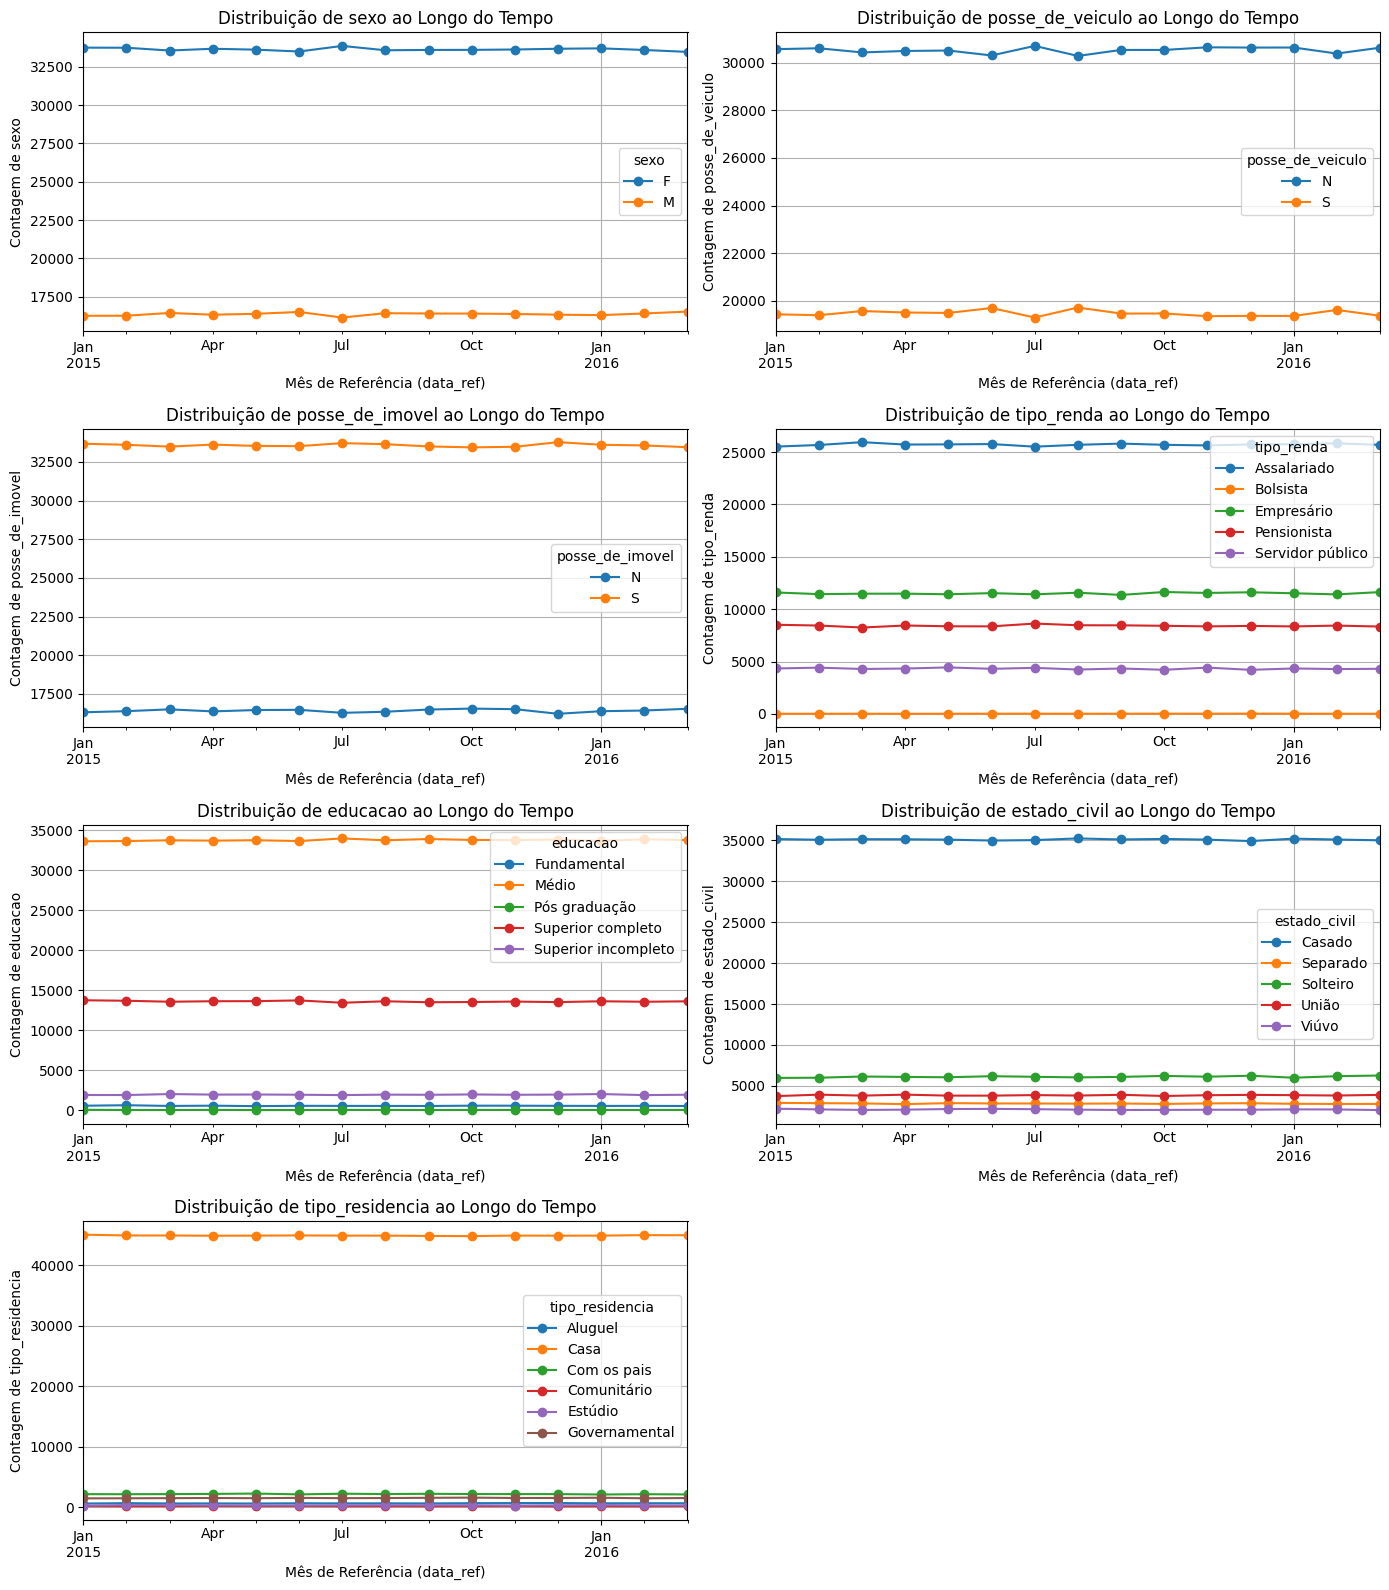

In [8]:
# Plotar a média de renda ao longo do tempo para cada variável qualitativa

# Configuração dos subplots: 4 linhas e 2 colunas
fig, axes = plt.subplots(4, 2, figsize=(14, 16))  # 4 linhas para acomodar 7 gráficos, e 2 colunas

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotar cada gráfico em seu respectivo subplot
for i, var in enumerate(qualitativas):
    df.groupby(['data_ref', var]).size().unstack().plot(marker='o', linestyle='-', ax=axes[i])
    axes[i].set_title(f'Distribuição de {var} ao Longo do Tempo')
    axes[i].set_xlabel('Mês de Referência (data_ref)')
    axes[i].set_ylabel(f'Contagem de {var}')
    axes[i].grid(True)

# Remover o último subplot vazio
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

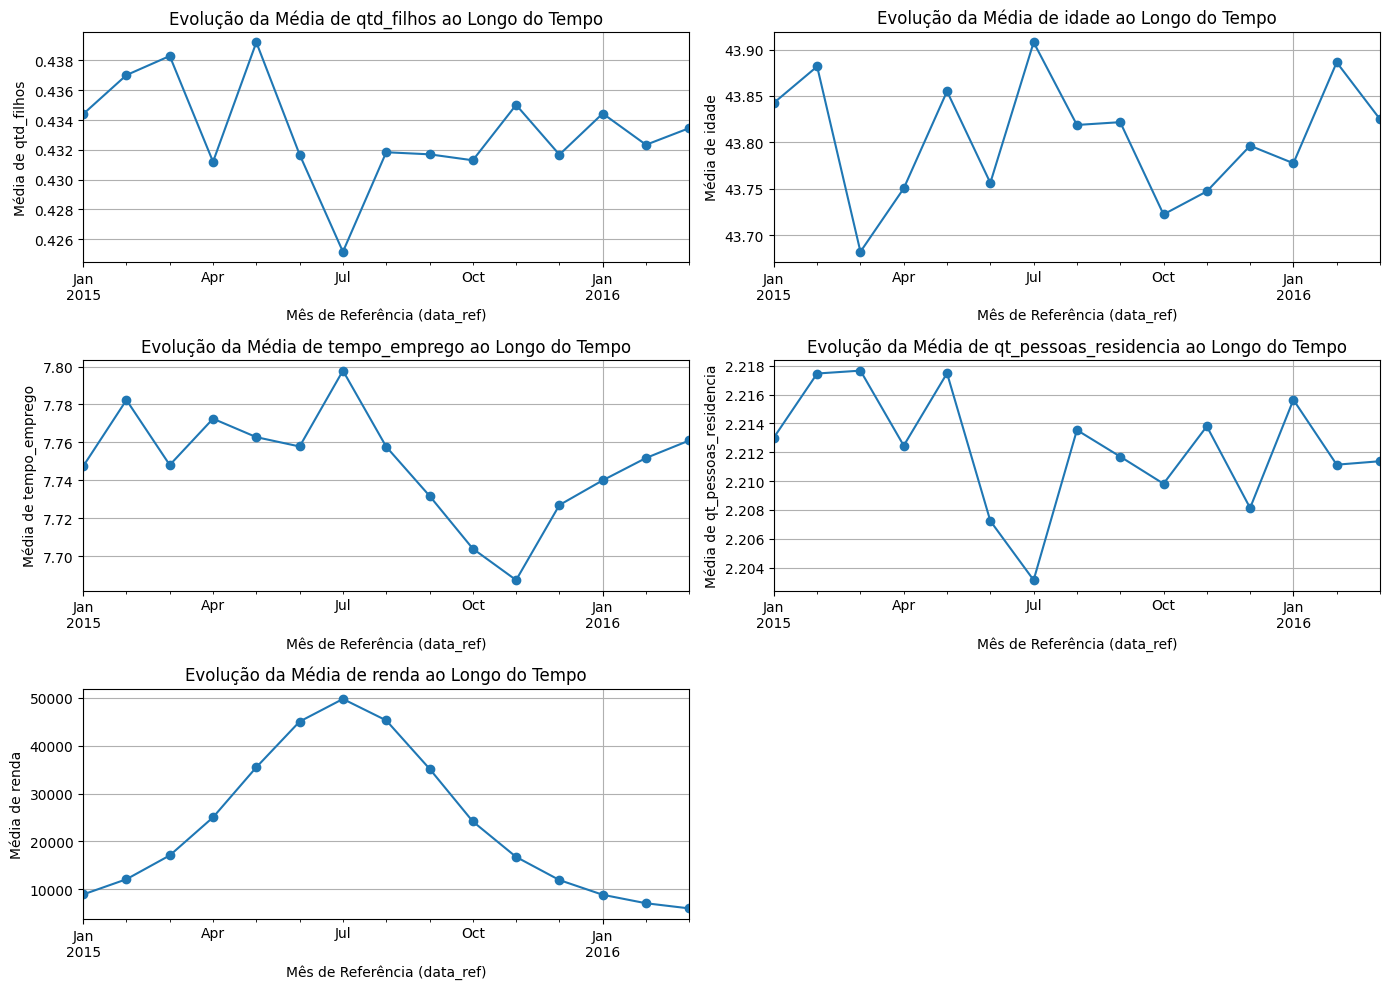

In [9]:
# Configuração dos subplots: 2 linhas e 2 colunas
fig, axes = plt.subplots(3, 2, figsize=(14, 10))  # 2 linhas para acomodar 4 gráficos, e 2 colunas

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotar cada gráfico em seu respectivo subplot
for i, var in enumerate(quantitativas):
    df.groupby('data_ref')[var].mean().plot(marker='o', linestyle='-', ax=axes[i])
    axes[i].set_title(f'Evolução da Média de {var} ao Longo do Tempo')
    axes[i].set_xlabel('Mês de Referência (data_ref)')
    axes[i].set_ylabel(f'Média de {var}')
    axes[i].grid(True)

# Remover o último subplot vazio
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

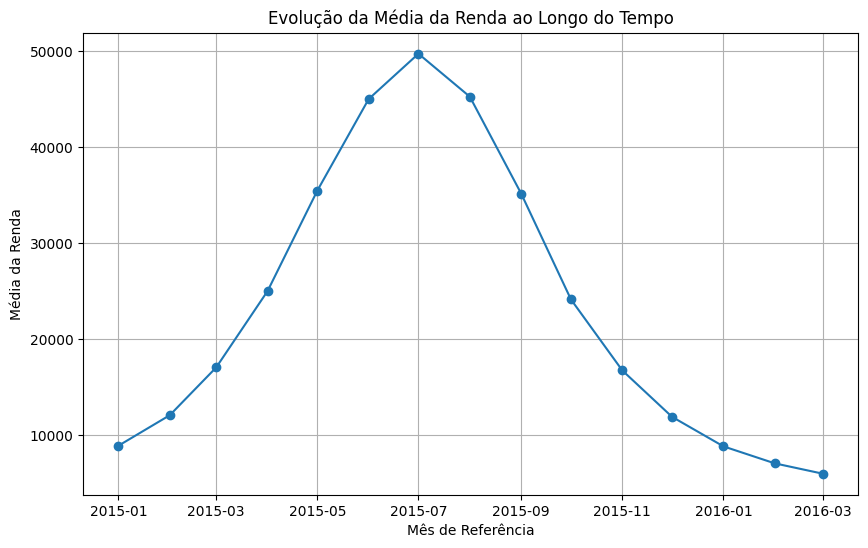

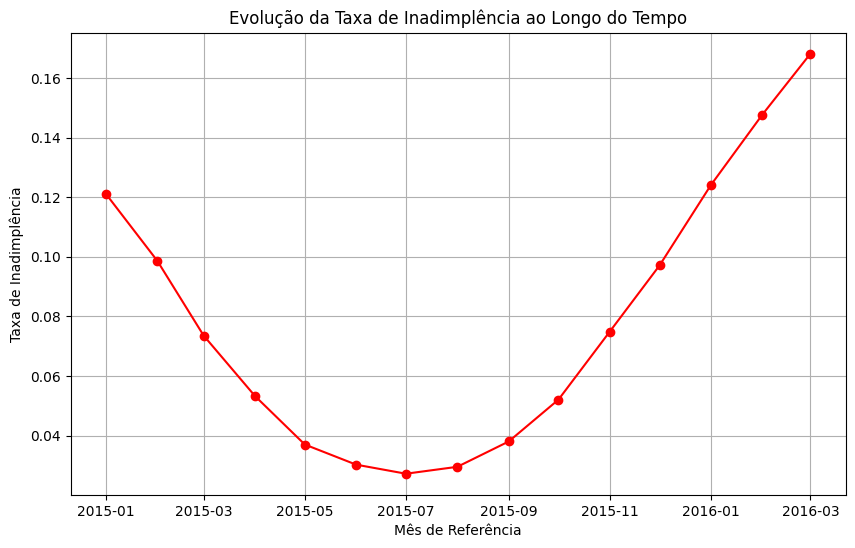

In [10]:
# Exemplo: Evolução da média da renda ao longo do tempo
renda_media_por_mes = df.groupby('data_ref')['renda'].mean()

plt.figure(figsize=(10, 6))
plt.plot(renda_media_por_mes.index, renda_media_por_mes.values, marker='o')
plt.title('Evolução da Média da Renda ao Longo do Tempo')
plt.xlabel('Mês de Referência')
plt.ylabel('Média da Renda')
plt.grid(True)
plt.show()

# Exemplo: Evolução da taxa de inadimplência ao longo do tempo
# Assumindo que a variável de inadimplência seja binária (0 ou 1)
inadimplencia_por_mes = df.groupby('data_ref')['mau'].mean()

plt.figure(figsize=(10, 6))
plt.plot(inadimplencia_por_mes.index, inadimplencia_por_mes.values, marker='o', color='red')
plt.title('Evolução da Taxa de Inadimplência ao Longo do Tempo')
plt.xlabel('Mês de Referência')
plt.ylabel('Taxa de Inadimplência')
plt.grid(True)
plt.show()

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

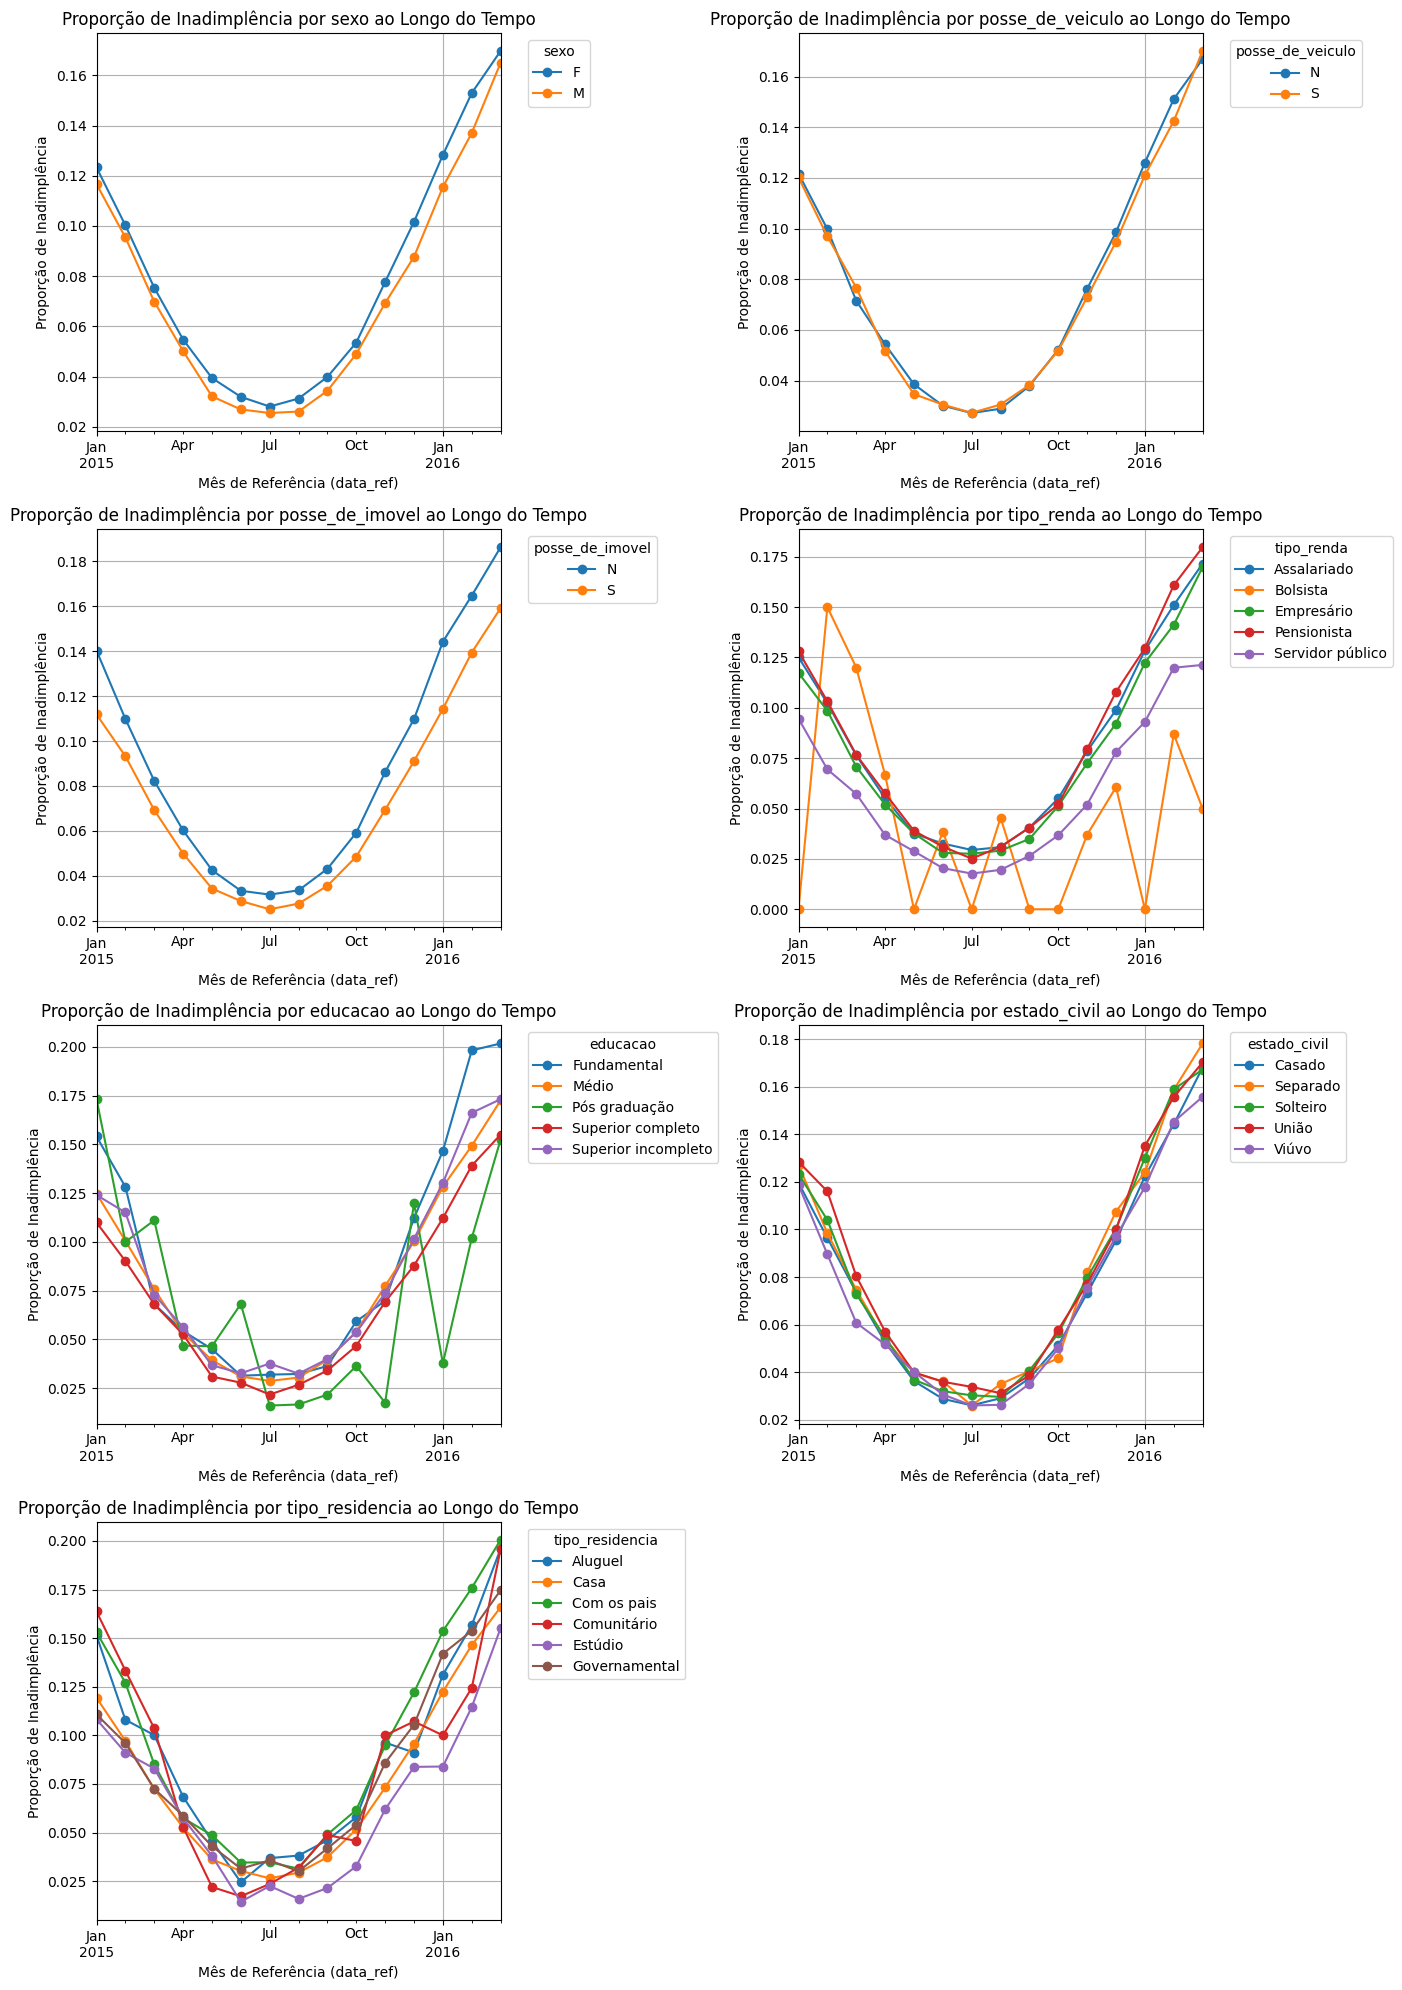

In [11]:
# Configuração dos subplots: 4 linhas e 2 colunas
fig, axes = plt.subplots(4, 2, figsize=(14, 20))  # Tamanho ajustado para melhor visualização

# Achatar o array de eixos para fácil iteração
axes = axes.flatten()

# Plotar cada gráfico em seu respectivo subplot
for i, var in enumerate(qualitativas):
    # Calcular a proporção de inadimplência por data_ref e variável qualitativa
    data = df.groupby(['data_ref', var])['mau'].mean().unstack()
    
    # Plotar o gráfico
    data.plot(marker='o', linestyle='-', ax=axes[i])
    
    # Configurações do gráfico
    axes[i].set_title(f'Proporção de Inadimplência por {var} ao Longo do Tempo')
    axes[i].set_xlabel('Mês de Referência (data_ref)')
    axes[i].set_ylabel('Proporção de Inadimplência')
    axes[i].legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True)

# Remover o último subplot vazio se houver número ímpar de gráficos
if len(qualitativas) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


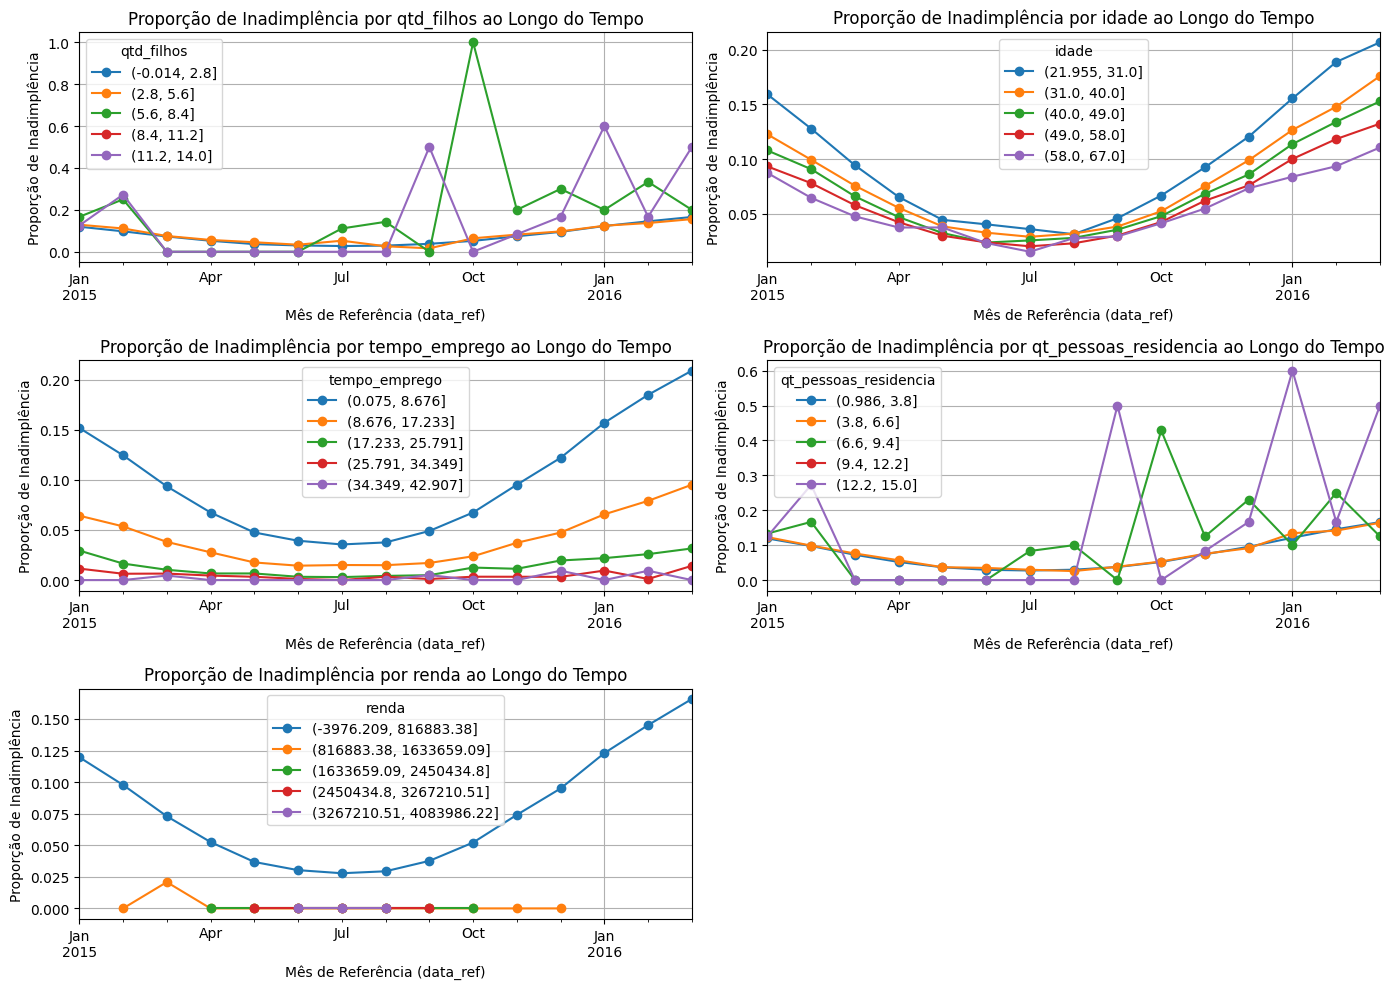

In [12]:
df = df.dropna(subset=quantitativas)

# Configuração dos subplots: 2 linhas e 2 colunas
fig, axes = plt.subplots(3, 2, figsize=(14, 10))  # 2 linhas para acomodar 5 gráficos, e 2 colunas

# Achatar o array de eixos para fácil iteração
axes = axes.flatten()

# Plotar cada gráfico em seu respectivo subplot
for i, var in enumerate(quantitativas):
    # Calcular a proporção de inadimplência por faixas da variável quantitativa ao longo do tempo
    data = df.groupby(['data_ref', pd.cut(df[var], bins=5)], observed=False)['mau'].mean().unstack()
    data.plot(marker='o', linestyle='-', ax=axes[i])
    axes[i].set_title(f'Proporção de Inadimplência por {var} ao Longo do Tempo')
    axes[i].set_xlabel('Mês de Referência (data_ref)')
    axes[i].set_ylabel('Proporção de Inadimplência')
    axes[i].grid(True)

# Remover o último subplot vazio
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

Obs: Tive que fazer a remoção de N/A no gráfico anterior, pois devido à configuração de ambiente (diferente do módulo passado), o gráfico de tempo_emprego não estava sendo feito com esse código.

In [17]:
# Excluir a variável 'posse_de_veiculo' (não discrimina)
df = df.drop(columns=['posse_de_veiculo'])

# Agrupar quantidade de filhos acima de 5 em uma única categoria "5+"
df['qtd_filhos'] = df['qtd_filhos'].apply(lambda x: '<6' if x <= 5 else '6+')

# Remover categorias 'Pensionista' e 'Bolsista' da variável 'tipo_renda'
df = df[~df['tipo_renda'].isin(['Pensionista', 'Bolsista'])]

# Agrupar "Pós-graduação" em "Superior ou mais" na variável 'educacao'
df['educacao'] = df['educacao'].replace({'Pós-graduação': 'Superior ou mais'})

# Criar nova variável 'faixa_idade', categorizando como "<30" e "30+"
df['faixa_idade'] = df['idade'].apply(lambda x: '<30' if x < 30 else '30+')

# Agrupar tempo de emprego acima de 25 anos em "25+ anos"
df['tempo_emprego'] = df['tempo_emprego'].apply(lambda x: "<25" if x < 25 else '25+ anos')

# Agrupar quantidade de pessoas na residência acima de 6 em "6+"
df['qt_pessoas_residencia'] = df['qt_pessoas_residencia'].apply(lambda x: '<7' if x <= 6 else '7+')

# Limitar a renda a valores de até 800.000 para tratar outliers
df = df[df['renda'] <= 800000]

KeyError: "['posse_de_veiculo'] not found in axis"

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Ordenando os dados por data
df_sorted = df.sort_values(by='data_ref')

# Definindo o período de corte para os últimos 3 meses
cutoff_date = df_sorted['data_ref'].max() - pd.DateOffset(months=3)

# Dividindo os dados em treino e teste com base na data
train_df = df_sorted[df_sorted['data_ref'] <= cutoff_date]
test_df = df_sorted[df_sorted['data_ref'] > cutoff_date]

# Criando variáveis dummy para as variáveis categóricas
X_train = pd.get_dummies(train_df.drop(columns=['mau', 'data_ref', 'index']))
X_test = pd.get_dummies(test_df.drop(columns=['mau', 'data_ref', 'index']))

# Garantindo que X_test e X_train tenham as mesmas colunas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Definindo y para treino e teste
y_train = train_df['mau']
y_test = test_df['mau']

In [18]:
# Ajustando o modelo de Regressão Logística com class_weight='balanced'
model = LogisticRegression(max_iter=3000, class_weight='balanced', random_state=66)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000, random_state=66)

In [19]:
# Ajustando o limiar para a classificação
threshold = 0.69 # Valor ajustado

# Avaliação na base de treino
y_prob_train = model.predict_proba(X_train)[:, 1]  # Probabilidades para a classe positiva na base de treino
y_pred_train_adjusted = (y_prob_train > threshold).astype(int)  # Aplicando o limiar ajustado

# Avaliação na base de teste
y_prob_test = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva na base de teste
y_pred_test_adjusted = (y_prob_test > threshold).astype(int)  # Aplicando o limiar ajustado

# Matriz de Confusão e Relatório de Classificação para a base de treino
conf_matrix_train = confusion_matrix(y_train, y_pred_train_adjusted)
class_report_train = classification_report(y_train, y_pred_train_adjusted)

# Matriz de Confusão e Relatório de Classificação para a base de teste
conf_matrix_test = confusion_matrix(y_test, y_pred_test_adjusted)
class_report_test = classification_report(y_test, y_pred_test_adjusted)

print("Avaliação na Base de Treino:")
print("Matriz de Confusão:")
print(conf_matrix_train)
print("\nRelatório de Classificação:")
print(class_report_train)

print("\nAvaliação na Base de Teste:")
print("Matriz de Confusão:")
print(conf_matrix_test)
print("\nRelatório de Classificação:")
print(class_report_test)


Avaliação na Base de Treino:
Matriz de Confusão:
[[458663   8508]
 [ 26963   3167]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96    467171
        True       0.27      0.11      0.15     30130

    accuracy                           0.93    497301
   macro avg       0.61      0.54      0.56    497301
weighted avg       0.90      0.93      0.91    497301


Avaliação na Base de Teste:
Matriz de Confusão:
[[98644  8091]
 [14019  4038]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.88      0.92      0.90    106735
        True       0.33      0.22      0.27     18057

    accuracy                           0.82    124792
   macro avg       0.60      0.57      0.58    124792
weighted avg       0.80      0.82      0.81    124792



## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [20]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import numpy as np

def ks_statistic(y_true, y_prob):
    """Calcula a estatística KS"""
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return max(tpr - fpr)

def gini_coefficient(y_true, y_prob):
    """Calcula o coeficiente Gini"""
    return 2 * roc_auc_score(y_true, y_prob) - 1

# Métricas na base de treino
accuracy_train = accuracy_score(y_train, y_pred_train_adjusted)
ks_train = ks_statistic(y_train, y_prob_train)
gini_train = gini_coefficient(y_train, y_prob_train)

# Métricas na base de teste (OOT)
accuracy_test = accuracy_score(y_test, y_pred_test_adjusted)
ks_test = ks_statistic(y_test, y_prob_test)
gini_test = gini_coefficient(y_test, y_prob_test)

# Exibindo os resultados
print("Avaliação na Base de Treino:")
print(f"Acurácia: {accuracy_train:.4f}")
print(f"KS: {ks_train:.4f}")
print(f"Gini: {gini_train:.4f}")

print("\nAvaliação na Base Out-of-Time (Teste):")
print(f"Acurácia: {accuracy_test:.4f}")
print(f"KS: {ks_test:.4f}")
print(f"Gini: {gini_test:.4f}")


Avaliação na Base de Treino:
Acurácia: 0.9287
KS: 0.4053
Gini: 0.5418

Avaliação na Base Out-of-Time (Teste):
Acurácia: 0.8228
KS: 0.3226
Gini: 0.4417


# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

In [21]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [22]:
df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [23]:
#Os dados nulos no tempo_emprego correspondem à categoria pensionista, não faz sentido substituí-los, vamos eliminar os dados.

In [33]:
# 1. Substituição de nulos
def substituir_nulos(df):
    df.dropna(inplace=True)
    return df

### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

In [25]:
#Os outliers são os dados que estão fora do intervalo entre 1,5 vezes o IQR abaixo do primeiro quartil (Q1) e 1,5 vezes o IQR acima do terceiro quartil (Q3).

In [34]:
# 2. Remoção de outliers
def remover_outliers(df):
    df = df.copy()
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return df

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [35]:
# 3. Criação de dummies
def criar_dummies(df):
    return pd.get_dummies(df, drop_first=True)

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

In [36]:
# 4. Seleção de variáveis usando feature importance
def selecionar_variaveis(X, y, n_features=8):
    model = RandomForestClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[-n_features:]  # Seleciona os índices das n_features mais importantes
    selected_columns = X.columns[indices]  # Nomes das variáveis selecionadas
    return X[selected_columns], selected_columns

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [37]:
# 5. Aplicação de PCA
def aplicar_pca(X, n_components=5):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [38]:
# Função para criar o pipeline
def preprocessamento(df):
    y = df['mau']
    X = df.drop(columns=['mau', 'index', 'data_ref'])
    
    # Aplicar as funções de pré-processamento
    df = substituir_nulos(df)
    df = remover_outliers(df)
    X = criar_dummies(X)
    
    # Verificação de consistência
    if X.shape[0] != y.shape[0]:
        raise ValueError("Número de amostras em X e y não coincide após pré-processamento")
    
    # Seleção de variáveis
    X_selecionado, colunas_selecionadas = selecionar_variaveis(X, y, n_features=8)
    
    # Verificação de consistência
    if X_selecionado.shape[0] != y.shape[0]:
        raise ValueError("Número de amostras em X e y não coincide após seleção de variáveis")
    
    # Aplicação de PCA
    X_pca = aplicar_pca(X_selecionado, n_components=5)
    
    # Adicionar a variável alvo de volta
    X_pca['mau'] = y.reset_index(drop=True)
    
    return X_pca, colunas_selecionadas

In [39]:
df_processado, variaveis_selecionadas = preprocessamento(df)
print(df_processado.head())
print("Variáveis selecionadas:", variaveis_selecionadas)

            PC1        PC2       PC3       PC4       PC5    mau
0 -23296.915975  -2.769966  0.730149 -1.303403 -0.527573  False
1 -22632.116234   5.607016  0.938488 -0.733795  0.189800  False
2 -24230.016484  10.616798  3.944145  1.903492 -0.786023  False
3 -12091.135529 -14.553057 -1.795215 -0.131585 -0.404075  False
4 -22921.226167   8.426696 -3.863560 -1.685813  0.200477  False
Variáveis selecionadas: Index(['sexo_M', 'tipo_renda_Empresário', 'qtd_filhos', 'posse_de_veiculo_S',
       'qt_pessoas_residencia', 'idade', 'tempo_emprego', 'renda'],
      dtype='object')


# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [40]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [41]:
dataset = df.sample(50000)

In [42]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

In [43]:
data = dataset.sample(frac=0.95, random_state=222)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (47500, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2500, 13)


In [44]:
data.qtd_filhos = data.qtd_filhos.astype(float) #forçando a variável qnt de filhos como numérica

In [45]:
from pycaret.classification import *


In [46]:
clf = setup(data = data, target = 'mau', session_id=123) 

,Description,Value
0,Session id,123
1,Target,mau
2,Target type,Binary
3,Original data shape,"(47500, 13)"
4,Transformed data shape,"(47500, 30)"
5,Transformed train set shape,"(33250, 30)"
6,Transformed test set shape,"(14250, 30)"
7,Numeric features,5
8,Categorical features,7
9,Rows with missing values,16.9%


In [47]:
lightgbm = create_model('lightgbm', class_weight='balanced')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7155,0.7141,0.5651,0.1549,0.2432,0.1331,0.1757
1,0.7317,0.7528,0.6357,0.1772,0.2771,0.1724,0.2258
2,0.7371,0.7488,0.6283,0.1792,0.2789,0.1750,0.2268
3,0.7290,0.7597,0.6468,0.1776,0.2786,0.1737,0.2291
4,0.7347,0.7756,0.6431,0.1804,0.2818,0.1779,0.2323
5,0.7260,0.7639,0.6543,0.1771,0.2787,0.1734,0.2303
6,0.7269,0.7545,0.6506,0.1769,0.2782,0.1730,0.2292
7,0.7341,0.7874,0.6877,0.1878,0.2951,0.1924,0.2544
8,0.7420,0.7670,0.6407,0.1852,0.2874,0.1847,0.2380


In [48]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7405,0.6779,0.4944,0.1547,0.2356,0.1281,0.1597
1,0.7377,0.7316,0.5836,0.1712,0.2648,0.1596,0.2044
2,0.7612,0.7174,0.4758,0.1639,0.2438,0.1403,0.1686
3,0.7555,0.7132,0.5056,0.1667,0.2507,0.1469,0.1794
4,0.7606,0.7414,0.5390,0.1775,0.2670,0.1654,0.2021
5,0.7591,0.7228,0.5242,0.1732,0.2604,0.1580,0.1928
6,0.7675,0.7223,0.5204,0.1786,0.2659,0.1654,0.1990
7,0.7708,0.7521,0.5390,0.1852,0.2757,0.1765,0.2122
8,0.7711,0.7500,0.5593,0.1904,0.2841,0.1854,0.2238


Fitting 10 folds for each of 10 candidates, totalling 100 fits


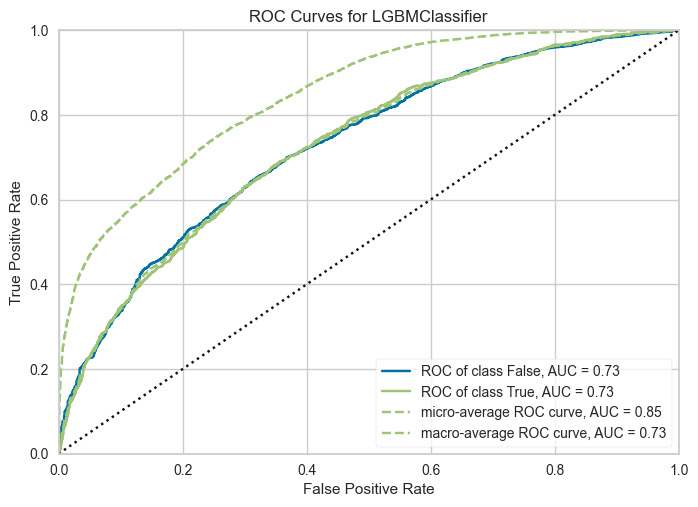

In [49]:
plot_model(tuned_lightgbm, plot='auc')

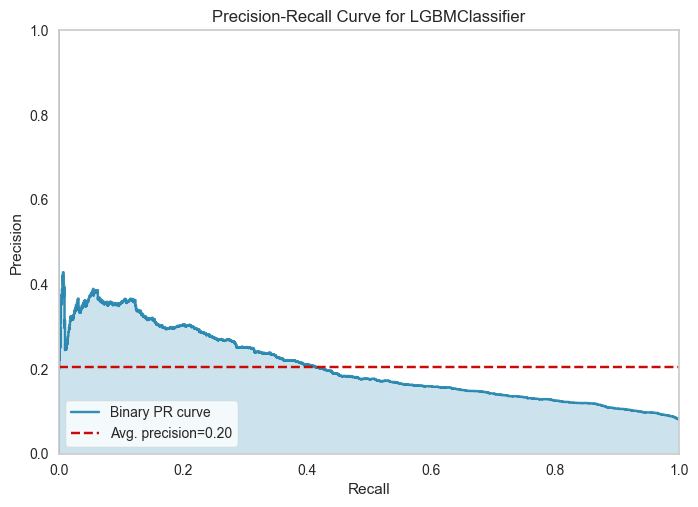

In [50]:
plot_model(tuned_lightgbm, plot = 'pr')

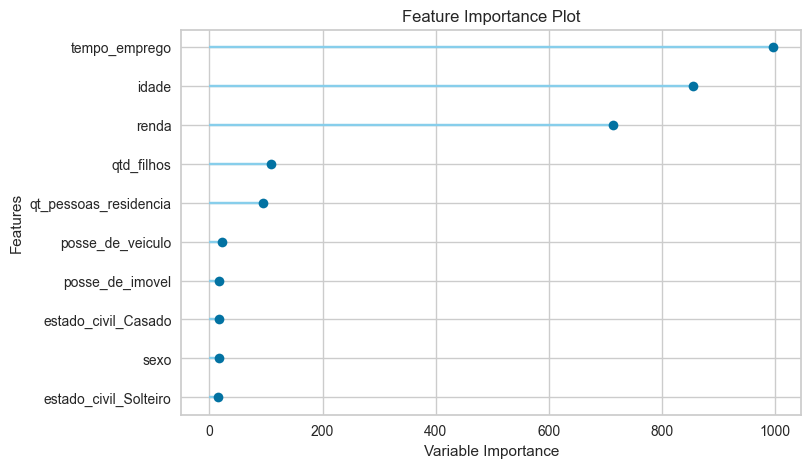

In [51]:
plot_model(tuned_lightgbm, plot='feature')

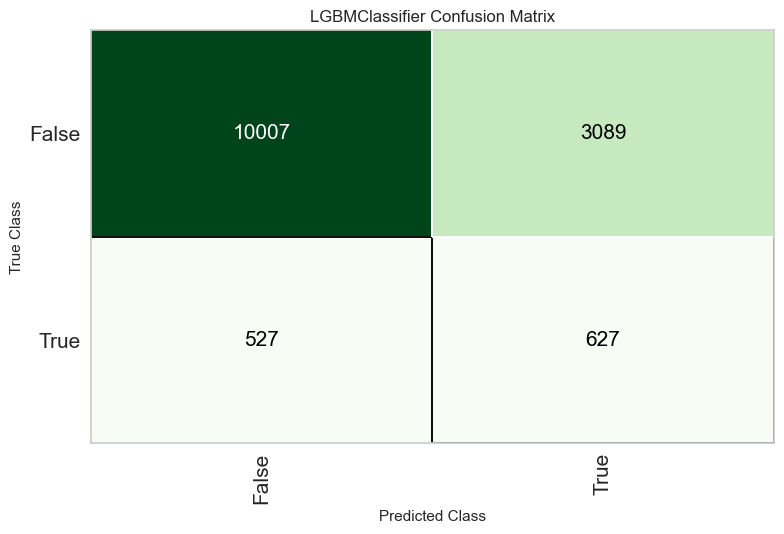

In [52]:
plot_model(tuned_lightgbm, plot='confusion_matrix')

In [53]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [54]:
predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7462,0.7289,0.5433,0.1687,0.2575,0.1528,0.1910


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,prediction_label,prediction_score
16155,F,N,N,0.0,Assalariado,Médio,Casado,Casa,53,27.041096,2.0,50500.359375,False,0,0.9923
27523,F,S,N,0.0,Empresário,Médio,Casado,Casa,43,12.301370,2.0,5840.169922,False,0,0.8559
3787,F,S,S,0.0,Empresário,Médio,Casado,Casa,46,8.769863,2.0,12652.129883,False,1,0.7263
46421,M,S,N,1.0,Empresário,Médio,Casado,Casa,44,3.838356,3.0,2459.550049,False,0,0.6862
6503,F,S,S,0.0,Pensionista,Médio,União,Casa,58,NaN,2.0,2403.760010,False,1,0.5616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,F,N,S,0.0,Assalariado,Superior completo,Casado,Casa,39,4.345205,2.0,2050.139893,False,1,0.6625
24719,F,N,S,0.0,Assalariado,Médio,Casado,Casa,36,7.358904,2.0,22020.160156,False,0,0.9430
45625,F,N,S,0.0,Assalariado,Médio,Casado,Casa,50,1.920548,2.0,8090.759766,False,0,0.9724
28659,F,N,S,0.0,Pensionista,Médio,Casado,Casa,51,NaN,2.0,17306.230469,False,1,0.6705


In [55]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [56]:
print(final_lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pessoas_residencia', 'renda'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWra...
                                boosting_type='gbdt', class_weight='balanced',
                     

In [57]:
predict_model(final_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7682,0.8939,0.9168,0.2481,0.3905,0.3014,0.4003


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


In [58]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7196,0.7183,0.5491,0.1323,0.2132,0.1145,0.1578


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,prediction_label,prediction_score
0,F,S,S,1,Assalariado,Superior completo,Solteiro,Casa,38,8.380822,2.0,49021.199219,False,0,0.9461
1,M,N,S,1,Empresário,Médio,Separado,Casa,37,6.013699,2.0,11636.179688,False,1,0.7288
2,M,N,N,0,Empresário,Médio,Solteiro,Casa,39,3.515069,1.0,2413.060059,False,0,0.6113
3,F,N,S,0,Assalariado,Médio,Solteiro,Casa,44,8.602739,1.0,10619.969727,False,0,0.8806
4,F,N,S,0,Pensionista,Fundamental,Casado,Casa,61,NaN,2.0,47315.500000,False,0,0.9768


In [59]:
save_model(final_lightgbm,'Final LightGBM Model 13Sep2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWra...
                                 boosting_type='gbdt', class_weight='balanced',
      